In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
## for data
import numpy as np
import pandas as pd## for plotting
import matplotlib.pyplot as plt
import seaborn as sns## for geospatial
import folium
import geopy## for machine learning
from sklearn import preprocessing, cluster
import scipy## for deep learning
from sklearn.cluster import DBSCAN

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks H-Farm/merged_data_encoded_with_clustered_kmeans_district_final.csv')

In [11]:
df

,Unnamed: 0,rideable_type,Date time,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow,Snow Depth,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions,Duration,closest distrect from start,closest distrect from end,Start district name,Start district latitude,Start district longitudine,End district name,End district latitude,End district longitudine,Start count,End count,closest distrect from start copy,closest distrect from end copy,hour,day,Duration_log,cluster_start,centroids,cluster_end
0,0,electric_bike,02/01/2021 00:00:00,2021-02-01 00:30:35,2021-02-01 01:27:41,11th & Kenyon St NW,31102.0,Georgia Ave & Piney Branch Rd NW,31414.0,38.929544,-77.027860,38.967578,-77.028057,member,-0.7,-0.7,-0.7,-6.9,NaN,0.0,0.00,4.02,25.3,21,NaN,6.5,100.0,90.20,Overcast,3426.0,5,18,Columbia Heights,38.928882,-77.029778,Petworth,38.942670,-77.025281,27945,16781,skirt2,outskirt,Night,Week_day,8.139149,6,0,2
1,1,classic_bike,02/01/2021 08:00:00,2021-02-01 08:54:39,2021-02-01 09:05:12,14th & Girard St NW,31123.0,14th St Heights / 14th & Crittenden St NW,31402.0,38.925284,-77.032375,38.947774,-77.032818,member,-1.6,-1.6,-1.6,-8.2,NaN,0.0,0.17,5.35,26.5,333,NaN,7.1,100.0,88.99,Snow,633.0,5,18,Columbia Heights,38.928882,-77.029778,Petworth,38.942670,-77.025281,27945,16781,skirt2,outskirt,Morning,Week_day,6.450470,6,0,6
2,2,classic_bike,02/01/2021 14:00:00,2021-02-01 14:53:52,2021-02-01 15:12:03,14th & Harvard St NW,31105.0,Georgia & New Hampshire Ave NW,31400.0,38.926800,-77.032200,38.936684,-77.024181,casual,0.0,0.0,0.0,-5.7,NaN,0.0,0.06,5.68,23.4,340,NaN,6.6,100.0,88.72,Snow,1091.0,5,18,Columbia Heights,38.928882,-77.029778,Petworth,38.942670,-77.025281,27945,16781,skirt2,outskirt,Afternoon,Week_day,6.994850,6,0,6
3,3,electric_bike,02/01/2021 15:00:00,2021-02-01 15:07:54,2021-02-01 15:12:46,14th & Irving St NW,31124.0,NaN,NaN,38.928717,-77.032217,38.940000,-77.020000,member,0.5,0.5,0.5,-4.9,NaN,0.0,0.06,5.74,22.6,339,40.7,4.1,99.3,87.82,Snow,292.0,5,18,Columbia Heights,38.928882,-77.029778,Petworth,38.942670,-77.025281,27945,16781,skirt2,outskirt,Afternoon,Week_day,5.676754,6,0,6
4,4,electric_bike,02/01/2021 15:00:00,2021-02-01 15:13:33,2021-02-01 15:21:13,Park Rd & Holmead Pl NW,31602.0,NaN,NaN,38.930746,-77.031286,38.950000,-77.020000,casual,0.5,0.5,0.5,-4.9,NaN,0.0,0.06,5.74,22.6,339,40.7,4.1,99.3,87.82,Snow,460.0,5,18,Columbia Heights,38.928882,-77.029778,Petworth,38.942670,-77.025281,27945,16781,skirt2,outskirt,Afternoon,Week_day,6.131226,6,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453736,457499,classic_bike,04/25/2021 15:00:00,2021-04-25 15:19:12,2021-04-25 16:06:25,Jefferson Dr & 14th St SW,31247.0,Mt Vernon Trail & S. Washington St.,31929.0,38.888553,-77.032427,38.793065,-77.049436,member,18.3,18.3,18.3,NaN,NaN,0.0,0.00,0.00,22.6,310,44.8,16.0,84.2,50.29,Overcast,2833.0,15,6,National Mall,38.887398,-77.036415,Congress Heights,38.842997,-76.995403,26742,9742,skirt2,outskirt,Afternoon,Week_end,7.949091,1,0,5
453737,457500,classic_bike,04/26/2021 12:00:00,2021-04-26 12:17:46,2021-04-26 12:59:34,Jefferson Memorial,31249.0,Prince St & Union St,31041.0,38.879819,-77.037413,38.803124,-77.040363,casual,15.5,15.5,15.5,NaN,NaN,0.0,0.00,0.00,22.1,311,36.9,16.0,0.0,23.62,Clear,2508.0,15,6,National Mall,38.887398,-77.036415,Congress Heights,38.842997,-76.995403,26742,9742,skirt2,outskirt,Afternoon,Week_day,7.827241,1,0,5
453738,457501,electric_bike,04/27/2021 11:00:00,2021-04-27 11:32:38,2021-04-27 11:57:15,Jefferson Memorial,31249.0,Prince St & Union St,31041.0,38.879786,-77.037337,38.803253,-77.040232,casual,19.0,19.0,19.0,NaN,NaN,0.0,0.00,0.00,10.8,170,NaN,16.0,79.3,50.09,Overcast,14

Text(0.5, 1.0, 'Clustering (k=8)')

/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


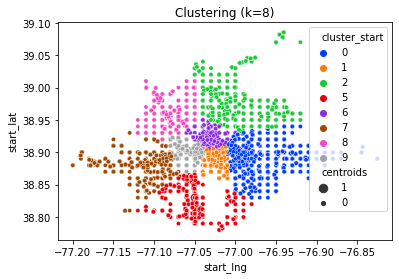

In [16]:
## plot
fig, ax = plt.subplots()
sns.scatterplot(x="start_lng", y="start_lat", data=df, 
                palette=sns.color_palette("bright",8),
                hue='cluster_start', size="centroids", size_order=[1,0],
                legend="brief", ax=ax).set_title('Clustering (k='+str(8)+')')
              

Text(0.5, 1.0, 'Clustering (k=8)')

/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


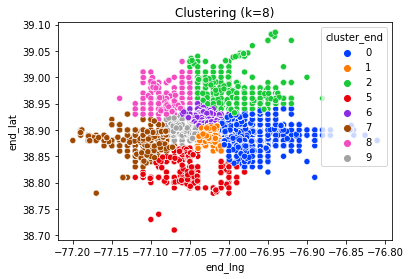

In [18]:
## plot
fig, ax = plt.subplots()
sns.scatterplot(x="end_lng", y="end_lat", data=df, 
                palette=sns.color_palette("bright",8),
                hue='cluster_end', size_order=[1,0],
                legend="brief", ax=ax).set_title('Clustering (k='+str(8)+')')

In [47]:
df1 = df.copy()
df1.loc[df1['closest distrect from start']==1,['cluster_start']]=10
df1.loc[df1['closest distrect from end']==1,['cluster_end']]=10
df1.loc[df1['closest distrect from start']==6,['cluster_start']]=10
df1.loc[df1['closest distrect from end']==6,['cluster_end']]=10
df1.loc[(df1['start_lat']<=38.862604) & (df1['start_lng']<=-77.028964),['cluster_start']]=5
df1.loc[(df1['end_lat']<=38.862604) & (df1['end_lng']<=-77.028964),['cluster_end']]=5


Text(0.5, 1.0, 'Clustering (k=8)')

/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


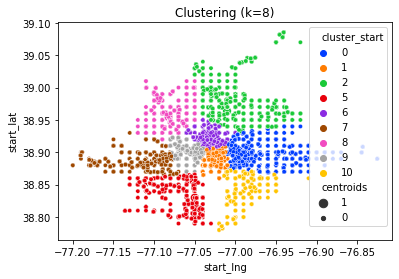

In [48]:
## plot
fig, ax = plt.subplots()
sns.scatterplot(x="start_lng", y="start_lat", data=df1, 
                palette=sns.color_palette("bright",9),
                hue='cluster_start', size="centroids", size_order=[1,0],
                legend="brief", ax=ax).set_title('Clustering (k='+str(8)+')')

Text(0.5, 1.0, 'Clustering (k=8)')

/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


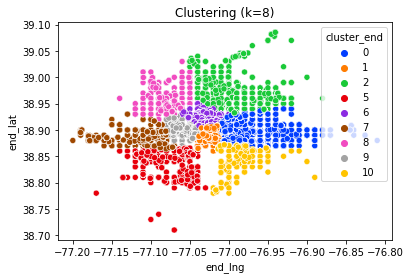

In [50]:
## plot
fig, ax = plt.subplots()
sns.scatterplot(x="end_lng", y="end_lat", data=df1, 
                palette=sns.color_palette("bright",9),
                hue='cluster_end', size_order=[1,0],
                legend="brief", ax=ax).set_title('Clustering (k='+str(8)+')')

In [51]:
df1

,Unnamed: 0,rideable_type,Date time,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow,Snow Depth,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions,Duration,closest distrect from start,closest distrect from end,Start district name,Start district latitude,Start district longitudine,End district name,End district latitude,End district longitudine,Start count,End count,closest distrect from start copy,closest distrect from end copy,hour,day,Duration_log,cluster_start,centroids,cluster_end
0,0,electric_bike,02/01/2021 00:00:00,2021-02-01 00:30:35,2021-02-01 01:27:41,11th & Kenyon St NW,31102.0,Georgia Ave & Piney Branch Rd NW,31414.0,38.929544,-77.027860,38.967578,-77.028057,member,-0.7,-0.7,-0.7,-6.9,NaN,0.0,0.00,4.02,25.3,21,NaN,6.5,100.0,90.20,Overcast,3426.0,5,18,Columbia Heights,38.928882,-77.029778,Petworth,38.942670,-77.025281,27945,16781,skirt2,outskirt,Night,Week_day,8.139149,6,0,2
1,1,classic_bike,02/01/2021 08:00:00,2021-02-01 08:54:39,2021-02-01 09:05:12,14th & Girard St NW,31123.0,14th St Heights / 14th & Crittenden St NW,31402.0,38.925284,-77.032375,38.947774,-77.032818,member,-1.6,-1.6,-1.6,-8.2,NaN,0.0,0.17,5.35,26.5,333,NaN,7.1,100.0,88.99,Snow,633.0,5,18,Columbia Heights,38.928882,-77.029778,Petworth,38.942670,-77.025281,27945,16781,skirt2,outskirt,Morning,Week_day,6.450470,6,0,6
2,2,classic_bike,02/01/2021 14:00:00,2021-02-01 14:53:52,2021-02-01 15:12:03,14th & Harvard St NW,31105.0,Georgia & New Hampshire Ave NW,31400.0,38.926800,-77.032200,38.936684,-77.024181,casual,0.0,0.0,0.0,-5.7,NaN,0.0,0.06,5.68,23.4,340,NaN,6.6,100.0,88.72,Snow,1091.0,5,18,Columbia Heights,38.928882,-77.029778,Petworth,38.942670,-77.025281,27945,16781,skirt2,outskirt,Afternoon,Week_day,6.994850,6,0,6
3,3,electric_bike,02/01/2021 15:00:00,2021-02-01 15:07:54,2021-02-01 15:12:46,14th & Irving St NW,31124.0,NaN,NaN,38.928717,-77.032217,38.940000,-77.020000,member,0.5,0.5,0.5,-4.9,NaN,0.0,0.06,5.74,22.6,339,40.7,4.1,99.3,87.82,Snow,292.0,5,18,Columbia Heights,38.928882,-77.029778,Petworth,38.942670,-77.025281,27945,16781,skirt2,outskirt,Afternoon,Week_day,5.676754,6,0,6
4,4,electric_bike,02/01/2021 15:00:00,2021-02-01 15:13:33,2021-02-01 15:21:13,Park Rd & Holmead Pl NW,31602.0,NaN,NaN,38.930746,-77.031286,38.950000,-77.020000,casual,0.5,0.5,0.5,-4.9,NaN,0.0,0.06,5.74,22.6,339,40.7,4.1,99.3,87.82,Snow,460.0,5,18,Columbia Heights,38.928882,-77.029778,Petworth,38.942670,-77.025281,27945,16781,skirt2,outskirt,Afternoon,Week_day,6.131226,6,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453736,457499,classic_bike,04/25/2021 15:00:00,2021-04-25 15:19:12,2021-04-25 16:06:25,Jefferson Dr & 14th St SW,31247.0,Mt Vernon Trail & S. Washington St.,31929.0,38.888553,-77.032427,38.793065,-77.049436,member,18.3,18.3,18.3,NaN,NaN,0.0,0.00,0.00,22.6,310,44.8,16.0,84.2,50.29,Overcast,2833.0,15,6,National Mall,38.887398,-77.036415,Congress Heights,38.842997,-76.995403,26742,9742,skirt2,outskirt,Afternoon,Week_end,7.949091,1,0,5
453737,457500,classic_bike,04/26/2021 12:00:00,2021-04-26 12:17:46,2021-04-26 12:59:34,Jefferson Memorial,31249.0,Prince St & Union St,31041.0,38.879819,-77.037413,38.803124,-77.040363,casual,15.5,15.5,15.5,NaN,NaN,0.0,0.00,0.00,22.1,311,36.9,16.0,0.0,23.62,Clear,2508.0,15,6,National Mall,38.887398,-77.036415,Congress Heights,38.842997,-76.995403,26742,9742,skirt2,outskirt,Afternoon,Week_day,7.827241,1,0,5
453738,457501,electric_bike,04/27/2021 11:00:00,2021-04-27 11:32:38,2021-04-27 11:57:15,Jefferson Memorial,31249.0,Prince St & Union St,31041.0,38.879786,-77.037337,38.803253,-77.040232,casual,19.0,19.0,19.0,NaN,NaN,0.0,0.00,0.00,10.8,170,NaN,16.0,79.3,50.09,Overcast,14

In [52]:
df1.to_csv('/content/drive/MyDrive/Colab Notebooks H-Farm/merged_data_encoded_with_clustered_kmeans_district_final_withriver.csv')